In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, class_sep=0.8)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

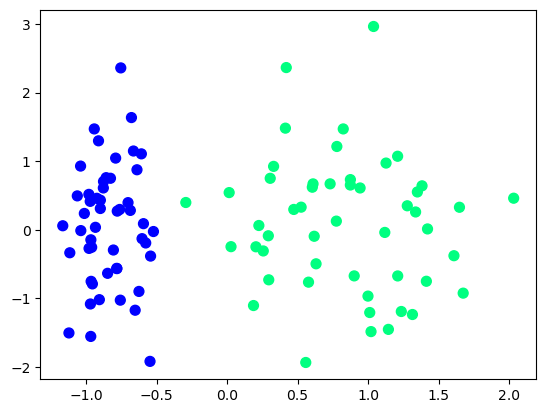

In [4]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)

In [5]:
class Perceptron:
    def __init__(self, epoch= 1000, lr= 0.1):
        self.lr = lr
        self.epoch = epoch
        self.weights = None
        
    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis=1)
        self.weights = np.ones(x_train.shape[1])
        for _ in range(self.epoch):
            e = np.random.randint(0, x_train.shape[0])
            y_hat = 1 if np.dot(x_train[e], self.weights) > 0 else 0
            self.weights -= self.lr * (y_hat - y_train[e]) * x_train[e]
    
    def predict(self, x_test):
        if x_test.ndim == 1:
            return 1 if (np.dot(x_test, self.weights[1:]) + self.weights[0]) > 0 else 0
        else:
            return (np.dot(x_test, self.weights[1:]) + self.weights[0] > 0).astype(int)

In [6]:
per = Perceptron(500, 0.1)

In [7]:
per.fit(x_train, y_train)

In [8]:
y_pred = per.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)* 100

95.0